## Import libraries and dataset

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/content/mobile_prices.csv')

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## EDA & Data PreProcessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
data["price_range"].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


Text(0.5, 1.0, 'Correlation ')

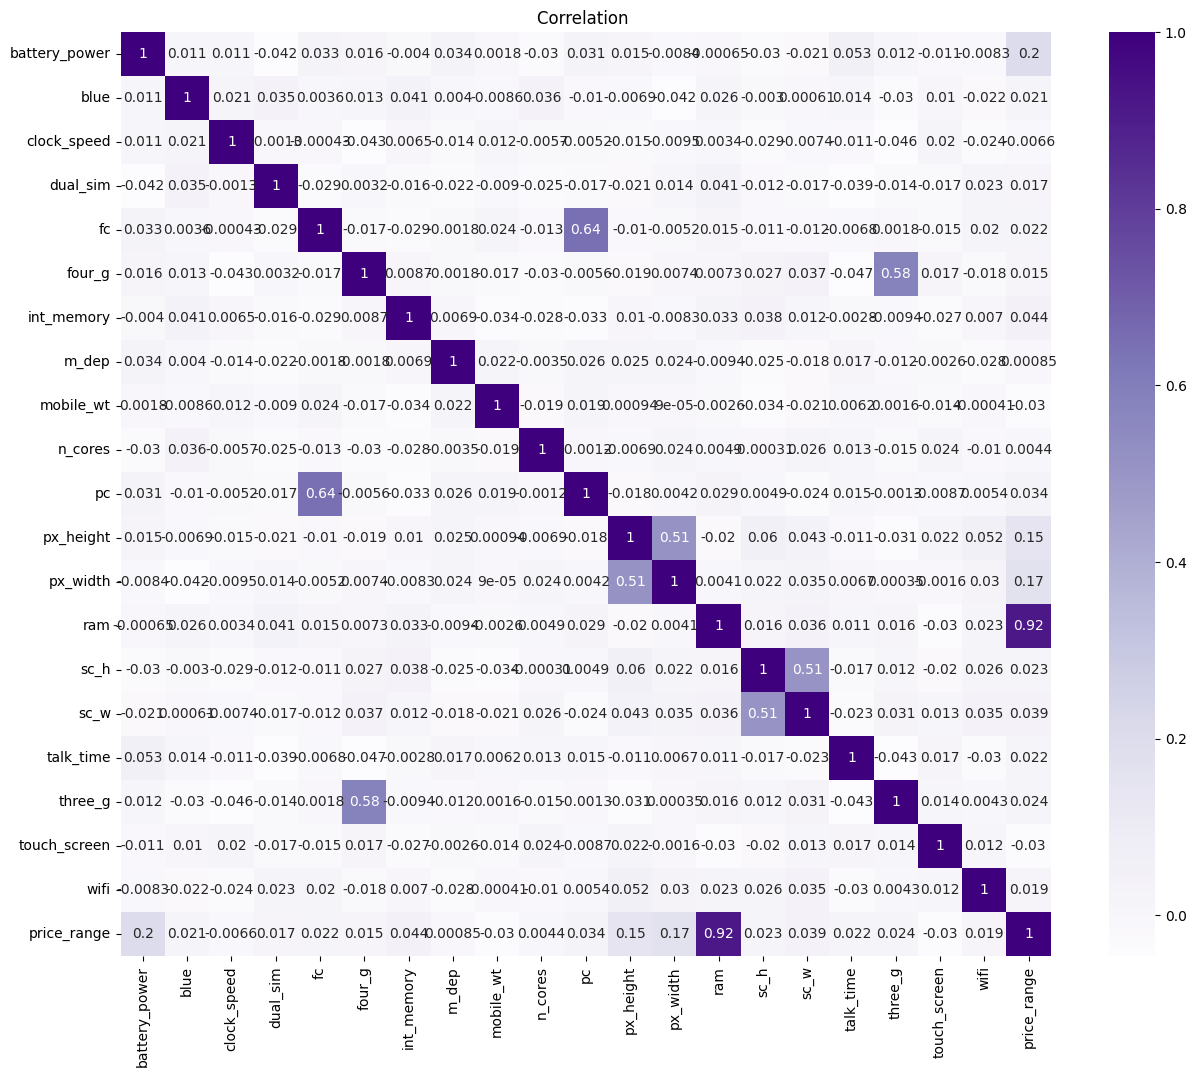

In [7]:
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples' , annot=True)
r.set_title("Correlation ")

In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
X = StandardScaler().fit_transform(X)

In [11]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [14]:
X.shape

(2000, 20)

In [15]:
y

array([1, 2, 2, ..., 3, 0, 3])

In [16]:
y.shape

(2000,)

## Training and Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 20)
(1600,)
(400, 20)
(400,)


#### Examinate Classification with Logistic_Regression



In [26]:
logreg =LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = logreg.predict(X_test)

In [28]:
y_pred

array([2, 3, 3, 0, 1, 1, 2, 3, 2, 1, 3, 0, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1,
       3, 1, 2, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 2, 0, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 3, 3, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 1,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 3, 0, 2, 0, 3,
       0, 2, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 0, 3, 3, 0, 0, 1, 3, 2, 3,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       0, 2, 3, 0, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 1, 3, 2, 2, 2,
       0, 2, 2, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 0, 3, 2, 0, 2, 1, 1, 0, 3, 3, 2, 2, 3, 2, 1, 2, 1, 1, 3, 0, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2, 0, 3, 0, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 3, 3, 3,

In [33]:
y_test[0]

np.int64(2)

In [30]:
X_test[0]

array([ 1.18705122, -0.9900495 , -0.14985287,  0.98117712,  0.15908825,
       -1.04396559,  1.70625635,  1.03435682, -0.37436279,  1.52124939,
        1.49823547,  1.66090168,  0.3042979 , -0.06566673,  1.58907778,
        1.43112714,  0.91330319, -1.78686097,  0.99401789, -1.01409939])

In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.9600
Precision: 0.9604
Recall: 0.9600
F1 Score: 0.9598

Confusion Matrix:
[[102   1   0   0]
 [  4  87   1   0]
 [  0   6  92   3]
 [  0   0   1 103]]


#### Examinate with K-NN

In [60]:
knn = KNeighborsClassifier(n_neighbors=71)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=71)

In [61]:
y_pred_knn = knn.predict(X_test)

In [62]:
y_pred_knn

array([1, 2, 2, 0, 0, 1, 2, 3, 3, 0, 2, 0, 3, 3, 2, 0, 2, 2, 0, 3, 0, 0,
       3, 0, 2, 3, 2, 3, 0, 1, 1, 2, 1, 0, 3, 2, 2, 3, 2, 0, 3, 0, 3, 3,
       3, 2, 0, 0, 1, 2, 1, 3, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 3, 1, 3, 1, 0, 2, 2, 0, 1,
       3, 1, 3, 1, 3, 2, 2, 2, 1, 1, 3, 3, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 3, 2, 0, 0, 0, 3, 2, 3,
       3, 0, 0, 0, 1, 0, 1, 2, 1, 3, 0, 1, 3, 0, 0, 0, 0, 1, 2, 0, 2, 0,
       1, 2, 2, 1, 0, 3, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 2, 3, 1, 0, 2, 2,
       0, 2, 3, 0, 0, 0, 2, 2, 2, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 0,
       0, 1, 3, 1, 3, 0, 2, 3, 3, 2, 2, 0, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3,
       3, 0, 2, 2, 0, 2, 1, 2, 0, 3, 3, 1, 0, 3, 2, 1, 2, 1, 1, 3, 1, 1,
       2, 1, 0, 0, 2, 1, 0, 0, 3, 3, 0, 1, 2, 1, 0, 2, 3, 1, 3, 1, 1, 1,
       0, 2, 3, 2, 3, 2, 1, 0, 1, 2, 2, 1, 3, 0, 2, 3, 2, 0, 1, 1, 1, 3,
       2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 3, 3,

In [63]:
y_test

array([2, 3, 3, 0, 1, 1, 2, 3, 2, 0, 3, 0, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1,
       3, 1, 2, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 2, 1, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 2, 3, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 3, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 3, 0, 2, 0, 3,
       0, 2, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 0, 3, 3, 0, 0, 1, 3, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       0, 2, 3, 0, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2,
       0, 2, 3, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 3, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 0, 3, 2, 0, 2, 1, 1, 0, 3, 3, 2, 2, 3, 2, 1, 2, 1, 1, 3, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2, 0, 3, 0, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 3, 3, 3,

In [64]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.6625
Precision: 0.6742
Recall: 0.6625
F1 Score: 0.6665

Confusion Matrix:
[[83 19  1  0]
 [21 52 19  0]
 [ 2 31 55 13]
 [ 0  1 28 75]]


In [65]:
error_rate = []

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

for i in range(1, 80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

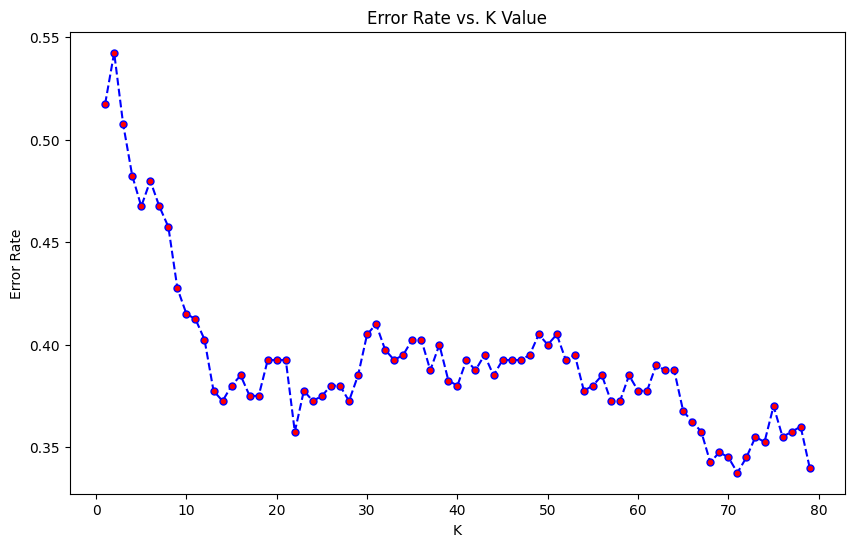

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 80), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
#Now we understand K=71 is best for now

#### Examinate Classification with Navie_bayes

In [67]:
navi = GaussianNB()
navi.fit(X_train , y_train)

GaussianNB()

In [69]:
y_pred_navi = navi.predict(X_test)

In [70]:
y_pred_navi

array([1, 3, 3, 0, 2, 1, 2, 3, 2, 1, 3, 0, 3, 3, 2, 0, 2, 2, 1, 3, 0, 1,
       3, 2, 2, 2, 2, 3, 0, 2, 1, 1, 0, 0, 3, 2, 0, 3, 2, 0, 3, 0, 2, 2,
       3, 3, 0, 0, 2, 1, 2, 3, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 3, 1, 1,
       2, 3, 2, 1, 2, 3, 0, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 1, 2, 1, 1, 1,
       2, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 3, 0, 2, 0, 3,
       0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 2, 0, 0, 1, 3, 2, 2,
       1, 0, 1, 0, 2, 0, 0, 2, 2, 3, 0, 2, 3, 2, 0, 0, 0, 2, 2, 1, 2, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 1, 1, 0, 0, 2, 3, 1, 2, 0, 2, 2,
       0, 1, 3, 0, 0, 0, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2,
       0, 1, 2, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 3, 1, 3, 1, 1, 2, 1, 1, 2,
       3, 0, 3, 2, 0, 2, 1, 1, 0, 3, 3, 2, 1, 3, 2, 1, 2, 1, 0, 3, 0, 1,
       2, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 2, 1, 1, 2, 0, 3, 0, 3, 3, 1, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 3, 3, 3,

In [71]:
y_test

array([2, 3, 3, 0, 1, 1, 2, 3, 2, 0, 3, 0, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1,
       3, 1, 2, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 2, 1, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 2, 3, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 3, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 3, 0, 2, 0, 3,
       0, 2, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 0, 3, 3, 0, 0, 1, 3, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       0, 2, 3, 0, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2,
       0, 2, 3, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 3, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 0, 3, 2, 0, 2, 1, 1, 0, 3, 3, 2, 2, 3, 2, 1, 2, 1, 1, 3, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2, 0, 3, 0, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 3, 3, 3,

In [72]:
accuracy = accuracy_score(y_test, y_pred_navi)
precision = precision_score(y_test, y_pred_navi, average='weighted')
recall = recall_score(y_test, y_pred_navi, average='weighted')
f1 = f1_score(y_test, y_pred_navi, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_navi)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.8175
Precision: 0.8167
Recall: 0.8175
F1 Score: 0.8171

Confusion Matrix:
[[100   3   0   0]
 [  5  65  22   0]
 [  0  24  68   9]
 [  0   0  10  94]]


#### Examinate Classification with SVM

In [98]:
svc = SVC(kernel='linear') #For now the best kernel is linear
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [99]:
y_pred_svc = svc.predict(X_test)

In [100]:
y_pred

array([2, 1, 3, 0, 2, 0, 2, 3, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 3, 0, 1,
       2, 0, 2, 1, 1, 3, 1, 2, 1, 2, 2, 0, 3, 2, 1, 3, 2, 0, 2, 1, 0, 2,
       3, 3, 2, 0, 2, 2, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 0, 0, 2, 3, 0, 1,
       2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 3, 1, 3, 2, 1, 0, 0, 0, 0,
       3, 1, 3, 1, 1, 3, 2, 3, 2, 2, 3, 1, 3, 2, 1, 1, 3, 2, 0, 2, 1, 3,
       1, 2, 0, 0, 0, 0, 3, 2, 2, 0, 2, 1, 0, 0, 3, 3, 0, 0, 0, 2, 1, 2,
       2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0, 2, 2, 0, 0, 1, 2, 3, 2, 2, 1, 0,
       1, 3, 2, 1, 0, 1, 3, 2, 2, 2, 0, 0, 0, 0, 1, 3, 3, 3, 3, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 2, 1, 2, 3, 3, 1, 1, 2, 3, 1, 0, 2, 1, 2, 1, 3,
       0, 0, 2, 0, 2, 0, 1, 3, 3, 2, 0, 1, 0, 3, 1, 2, 1, 2, 2, 0, 3, 1,
       3, 0, 2, 1, 0, 2, 0, 2, 0, 3, 2, 1, 2, 3, 2, 1, 2, 1, 1, 3, 0, 0,
       1, 0, 0, 1, 2, 2, 0, 0, 3, 3, 0, 1, 2, 1, 0, 3, 3, 1, 2, 1, 3, 0,
       0, 0, 1, 1, 1, 3, 0, 2, 0, 1, 1, 0, 3, 0, 2, 3, 1, 1, 2, 1, 2, 3,
       2, 3, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 3, 3,

In [101]:
y_test

array([2, 3, 3, 0, 1, 1, 2, 3, 2, 0, 3, 0, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1,
       3, 1, 2, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 2, 1, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 2, 3, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 3, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 3, 0, 2, 0, 3,
       0, 2, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 0, 3, 3, 0, 0, 1, 3, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       0, 2, 3, 0, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2,
       0, 2, 3, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 3, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 0, 3, 2, 0, 2, 1, 1, 0, 3, 3, 2, 2, 3, 2, 1, 2, 1, 1, 3, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2, 0, 3, 0, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 3, 3, 3,

In [102]:
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc, average='weighted')
recall = recall_score(y_test, y_pred_svc, average='weighted')
f1 = f1_score(y_test, y_pred_svc, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_svc)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.9600
Precision: 0.9600
Recall: 0.9600
F1 Score: 0.9599

Confusion Matrix:
[[101   2   0   0]
 [  4  86   2   0]
 [  0   4  95   2]
 [  0   0   2 102]]


#### Examinate Classification With ANN

In [103]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [104]:
y_pred_mlp = mlp.predict(X_test)

In [105]:
y_pred_mlp

array([2, 3, 3, 0, 1, 1, 2, 3, 2, 1, 2, 0, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1,
       3, 1, 2, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 3, 0, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 2, 3, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 1,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 1, 1, 1, 0, 1,
       3, 1, 3, 0, 3, 3, 3, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 2, 0, 2, 0, 3,
       0, 2, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 0, 3, 2, 0, 0, 1, 2, 2, 3,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 3, 1, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2,
       0, 2, 2, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 3, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 0, 3, 2, 0, 2, 1, 2, 0, 3, 3, 1, 2, 3, 2, 1, 2, 1, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2, 1, 3, 0, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 3, 3, 3,

In [106]:
y_test

array([2, 3, 3, 0, 1, 1, 2, 3, 2, 0, 3, 0, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1,
       3, 1, 2, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 2, 1, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 0, 0, 2, 2, 2, 3, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 3, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 0, 3, 3, 0, 2, 0, 3,
       0, 2, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 0, 3, 3, 0, 0, 1, 3, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 2, 2, 1, 0, 3, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3,
       0, 2, 3, 0, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2,
       0, 2, 3, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1, 3, 1, 3, 1, 1, 2, 1, 1, 3,
       3, 0, 3, 2, 0, 2, 1, 1, 0, 3, 3, 2, 2, 3, 2, 1, 2, 1, 1, 3, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 3, 3, 0, 2, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1,
       0, 2, 3, 3, 3, 3, 0, 1, 1, 2, 2, 0, 3, 0, 3, 3, 2, 0, 1, 1, 1, 3,
       3, 3, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 3, 3, 3,

In [107]:
accuracy = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp, average='weighted')
recall = recall_score(y_test, y_pred_mlp, average='weighted')
f1 = f1_score(y_test, y_pred_mlp, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.9275
Precision: 0.9279
Recall: 0.9275
F1 Score: 0.9275

Confusion Matrix:
[[100   3   0   0]
 [  5  82   5   0]
 [  0   5  92   4]
 [  0   0   7  97]]


In [144]:
ann = tf.keras.models.Sequential()

In [145]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [146]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall', 'AUC'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9200 - Precision: 0.9575 - Recall: 0.9724 - accuracy: 0.4415 - loss: -655865024.0000
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9094 - Precision: 0.9495 - Recall: 0.9736 - accuracy: 0.4527 - loss: -639086464.0000
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9034 - Precision: 0.9476 - Recall: 0.9681 - accuracy: 0.4577 - loss: -609399616.0000
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.8972 - Precision: 0.9457 - Recall: 0.9707 - accuracy: 0.4426 - loss: -647135424.0000
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9092 - Precision: 0.9520 - Recall: 0.9643 - accuracy: 0.4363 - loss: -649925632.0000
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.9050 - Precision: 0.9420 - Recall: 0.9842 - accuracy: 0.4591 - loss: -659761536.0000
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.9067 - Precision: 0.9528 - Recall: 0.9779 - accuracy: 0.

In [ ]:
y_pred = ann.predict(X_test)
y_pred_ann = np.round(y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann, average='weighted')
recall = recall_score(y_test, y_pred_ann, average='weighted')
f1 = f1_score(y_test, y_pred_ann, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_ann)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)